## Utility Setup (some plot configurations)

In [2]:
import numpy as np
import os
#set the random seed for numpy
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from matplotlib.colors import ListedColormap

#decision boundary plot
def plot_decision_boundary(clf, X, y, alpha=0.5, contour=True):
    axes = [np.min(X, axis=0)[0], np.max(X, axis=0)[0], np.min(X, axis=0)[1], np.max(X, axis=0)[1]]
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()] #compared to flatten, ravel doesn't return a copy
    y_pred = clf.predict(X_new).reshape(x1.shape)
    cmap1 = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contour(x1, x2, y_pred, alpha=0.3, cmap=cmap1)
    if contour:
        cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, alpha=0.8, cmap=cmap2)
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', alpha=alpha)
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r'$x_1$', fontsize=18)
    plt.xlabel(r'$x_2$', fontsize=18, rotation=0)

## Prepare the training and testing data from moons dataset 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## As we can see here, the voting classifier outperforms all individual classifiers

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('svc', svm_clf)],
    voting='soft')

for clf in [log_clf, rf_clf, svm_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.5f'%(accuracy_score(y_test, y_pred)))

LogisticRegression 0.86400
RandomForestClassifier 0.87200
SVC 0.88800
VotingClassifier 0.91200


/home/siming/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Bagging Ensembles

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                            n_estimators = 500,
                            n_jobs = -1,
                            oob_score = True,
                            random_state = 42)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, ' accuracy is %.5f'%(accuracy_score(y_test, y_pred_bag)),
     ', and oob accuray is %.5f'%(bag_clf.oob_score_))

bag_clf_pasting = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                    n_estimators = 500,
                                    max_samples = 50,
                                    bootstrap = False,
                                    random_state = 42)
bag_clf_pasting.fit(X_train, y_train)
y_pred_pasting = bag_clf_pasting.predict(X_test)
print(bag_clf.__class__.__name__, ' accuracy is %.5f'%(accuracy_score(y_test, y_pred_pasting)))

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = rf_clf.predict(X_test)
print(tree_clf.__class__.__name__, 'accuracy is %.5f'%(accuracy_score(y_test, y_pred_tree)))


BaggingClassifier  accuracy is 0.91200 , and oob accuray is 0.89867
BaggingClassifier  accuracy is 0.92000
DecisionTreeClassifier accuracy is 0.87200


## Plot the decision boundary, as we can observe that the single decision tree overfit the data. Bootstrapping introduces a bit more diversity in the subsets that each predictor is trained on, so bagging ends up with a slightly higher bias than pasting

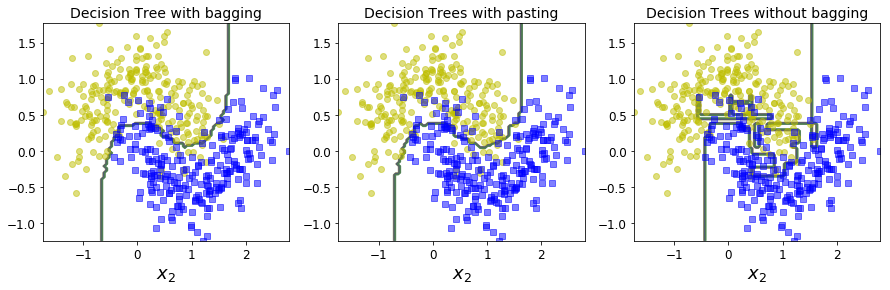

In [12]:
plt.figure(figsize=(15,4))
plt.subplot(131)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Tree with bagging", fontsize=14)
plt.subplot(132)
plot_decision_boundary(bag_clf_pasting, X, y)
plt.title("Decision Trees with pasting", fontsize=14)
plt.subplot(133)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Trees without bagging", fontsize=14)
plt.tight_layout
plt.show()